<a href="https://colab.research.google.com/github/HadiyaArfa/Store-Location-Analysis-in-Mumbai-India/blob/main/Store_Location_Analysis_in_Mumbai__India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**
Store Location Analysis in Mumbai, India

Objective: The objective of this task is to analyze potential store locations in Mumbai, India, to make data-driven decisions regarding the best place to open a new store. This analysis will consider factors such as population, average income, competitor count, and rent cost to determine the most promising location.

Location: Mumbai, India

Tasks:

Data Exploration: Explore the dataset by calculating summary statistics for "Population," "Average Income," "Competitor Count," and "Rent Cost." Create visualizations (e.g., histograms, scatter plots) to better understand the data.

Population vs. Income: Analyze the relationship between "Population" and "Average Income" by creating a scatter plot. Determine if there's any correlation between these factors.

Competitor Analysis: Analyze the impact of competitor stores on each potential location. Create a bar chart that shows the competitor count for each location.

Affordability Analysis: Create a scatter plot that compares "Average Income" and "Rent Cost" to assess the affordability of each location.

Recommendation: Based on your analysis, make a recommendation for the best store location in Mumbai. Consider factors like population, income, competitor count, and rent cost. Justify your choice.

Documentation: Document your analysis in a report, including key findings, data visualizations, and your location recommendation.

Tools to Be Used:

Python for data analysis and scripting.Pandas and Numpy for data handling and analysis.Matplotlib or Seaborn for data visualization.Jupyter Notebook for documenting the analysis.

1. Data Exploration:

In [ ]:
#Summary Statistics:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/store_location_data.csv')

# Display summary statistics
summary_stats = data.describe()
print(summary_stats)

         Population  Average Income  Competitor Count     Rent Cost
count     12.000000       12.000000         12.000000     12.000000
mean   27416.666667    41666.666667          2.833333  15108.333333
std     6331.139971     6813.533769          1.267304    543.487615
min    18000.000000    30000.000000          1.000000  14400.000000
25%    21750.000000    37250.000000          2.000000  14600.000000
50%    28000.000000    42000.000000          3.000000  15200.000000
75%    32000.000000    45750.000000          4.000000  15500.000000
max    38000.000000    55000.000000          5.000000  16000.000000


Visualizations:

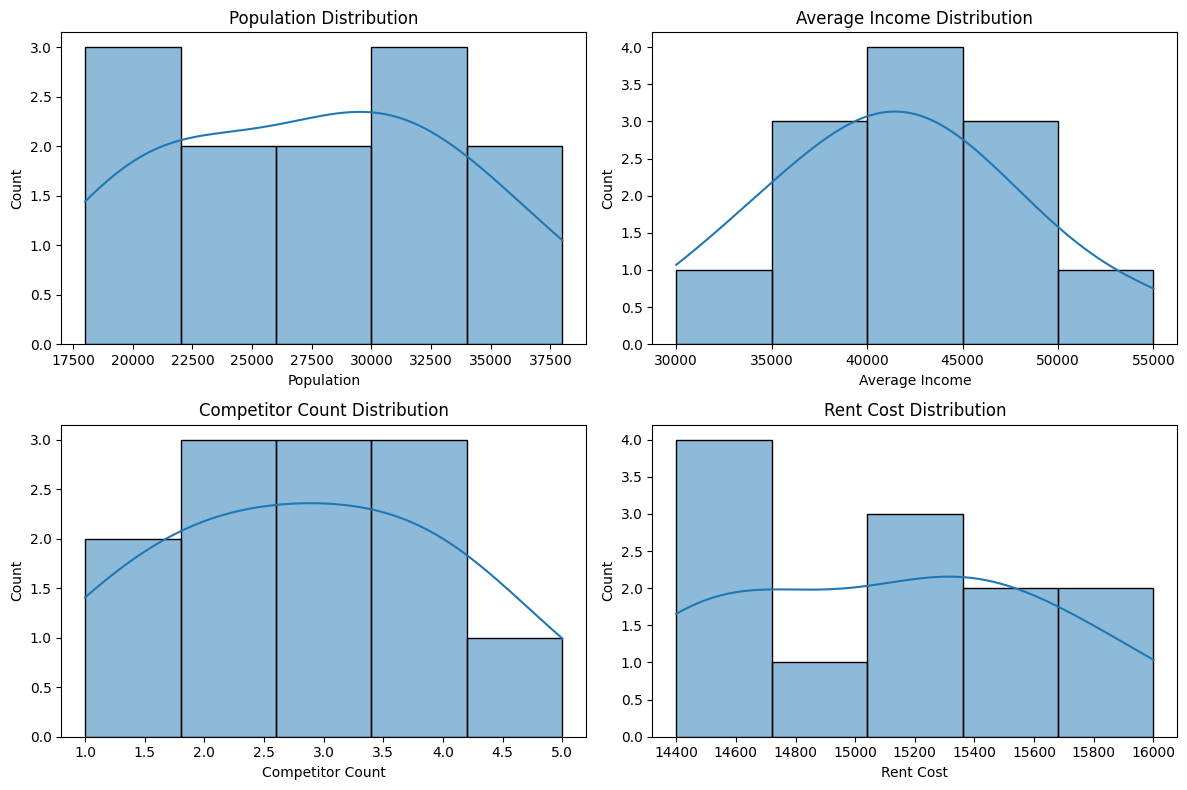

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each variable
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data['Population'], kde=True)
plt.title('Population Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['Average Income'], kde=True)
plt.title('Average Income Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['Competitor Count'], kde=True)
plt.title('Competitor Count Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['Rent Cost'], kde=True)
plt.title('Rent Cost Distribution')

plt.tight_layout()
plt.show()


The features are almost normally distributed

2. Population vs. Income:

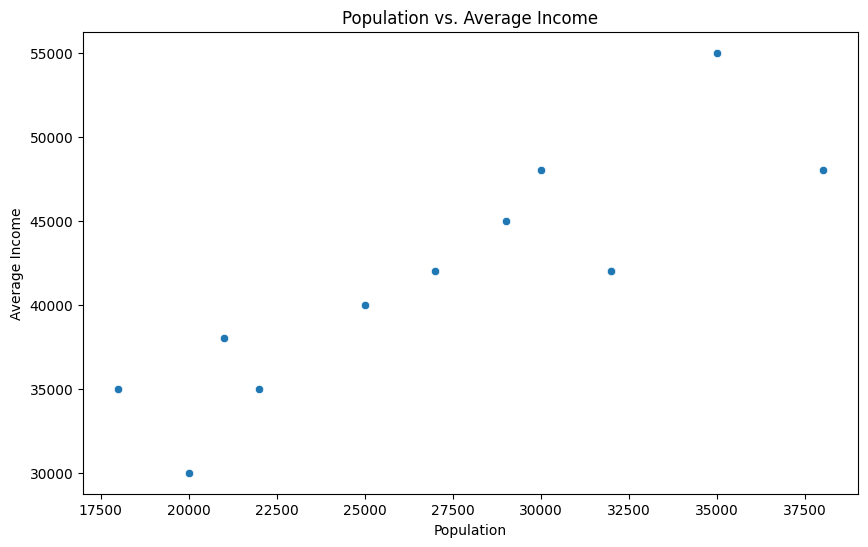

In [ ]:
# Scatter plot for Population vs. Average Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Average Income', data=data)
plt.title('Population vs. Average Income')
plt.xlabel('Population')
plt.ylabel('Average Income')
plt.show()


The scatter plot conveys a positive correlation between population and average income. This means that as population increases, average income also tends to increase.

3. Competitor Analysis:

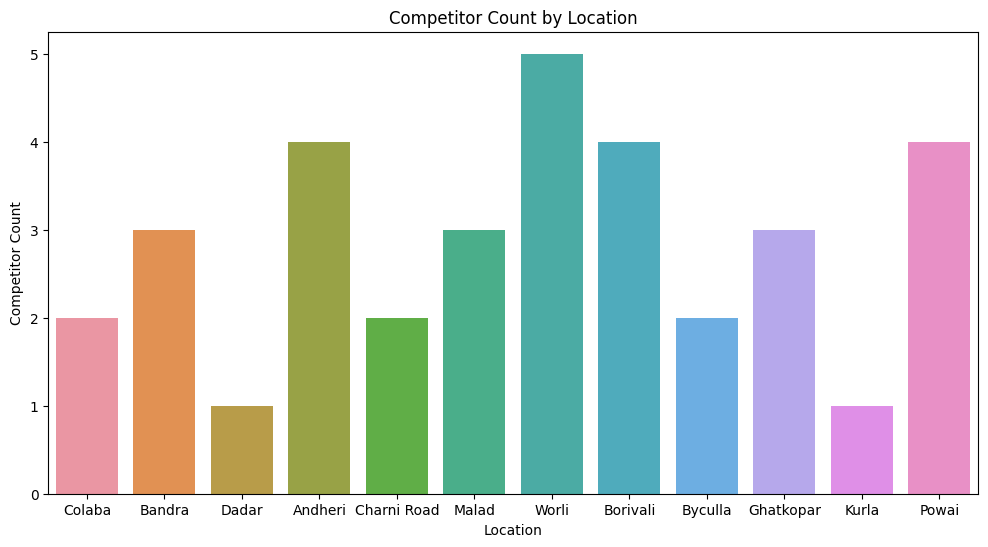

In [ ]:
# Bar chart for Competitor Count by Location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Competitor Count', data=data)
plt.title('Competitor Count by Location')
plt.xlabel('Location')
plt.ylabel('Competitor Count')
plt.show()


From the visualization we can convey that WORLI has the highest competitors,but worli also has the highest average income

4. Affordability Analysis:

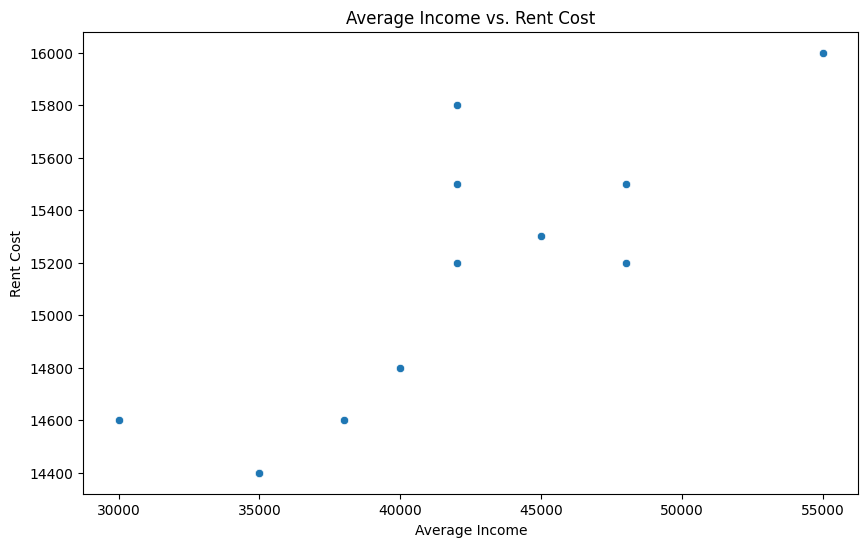

In [ ]:
# Scatter plot for Average Income vs. Rent Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Income', y='Rent Cost', data=data)
plt.title('Average Income vs. Rent Cost')
plt.xlabel('Average Income')
plt.ylabel('Rent Cost')
plt.show()


The plot conveys a positive correlation between average income and rent cost in Mumbai. This means that as average income increases, rent cost also tends to increase.

To find the best location we can assign weights to the features

In [ ]:
df=data[['Population', 'Average Income', 'Competitor Count', 'Rent Cost']]
df.head()

,Population,Average Income,Competitor Count,Rent Cost
0,25000.0,40000.0,2.0,14800.0
1,32000.0,42000.0,3.0,15200.0
2,18000.0,35000.0,1.0,14400.0
3,38000.0,48000.0,4.0,15500.0
4,21000.0,38000.0,2.0,14600.0


Since popoulation and income are most important features to consider we assign it to a highers weight

In [ ]:
# Define weights for each factor
population_weight = 0.3
income_weight = 0.3
competitor_weight = 0.2
rent_weight = 0.2

# Normalize data
normalized_data = (df - df.min()) / (df.max() - df.min())

# Create a score for each location
data['Score'] = (
    normalized_data['Population'] * population_weight +
    normalized_data['Average Income'] * income_weight +
    (1 - normalized_data['Competitor Count']) * competitor_weight +  # Invert competitor count for better scores
    (1 - normalized_data['Rent Cost']) * rent_weight  # Invert rent cost for better scores
)

# Find the location with the highest score
best_location = data.loc[data['Score'].idxmax()]

print(f"Best Location: {best_location['Location']} with a score of {best_location['Score']}")


Best Location: Andheri with a score of 0.6285000000000001


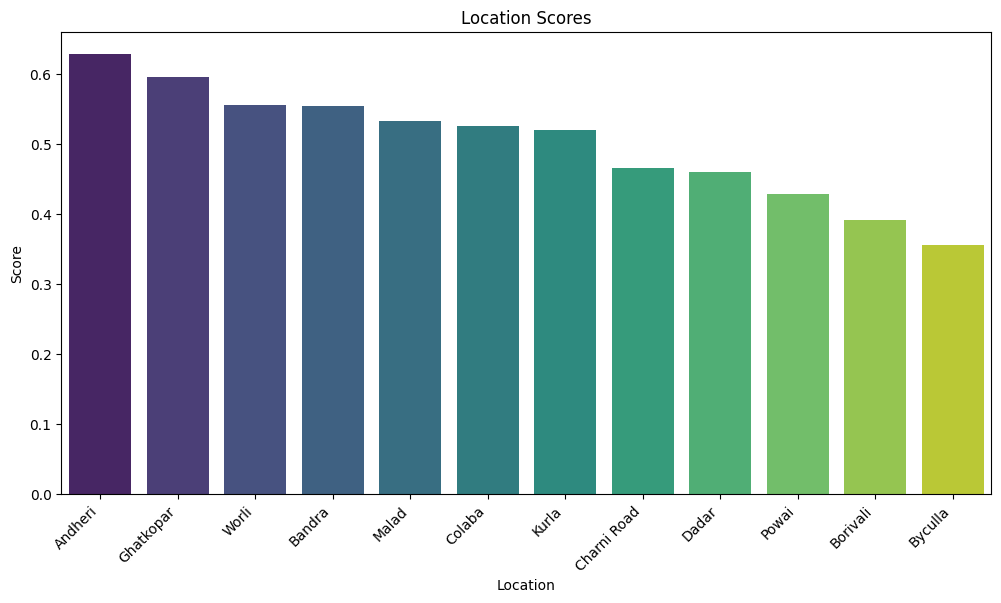

In [ ]:
# Sort data by Score in descending order
sorted_data = data.sort_values(by='Score', ascending=False)

# Bar chart for Scores by Location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Score', data=sorted_data, palette='viridis')
plt.title('Location Scores')
plt.xlabel('Location')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

 Recommendations:
 1. Based on the analysis Andheri is the best location for a store because it has the highest population of '38000', average income of '48000' but worli has the highest average income but the rent cost and competants are more,Andheri has '4' competants, and Rent cost of '15,500'

2. Though Dadar and Kurla have the lowest competitors i.e, '1' but it has less population and also less average income